# Working notebook for ALAN project as of November 28, 2023

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

import geopandas as gpd
import rasterio
import statsmodels.api as sm
from shapely.geometry import Point
from scipy.stats import pearsonr, spearmanr

### Import FAA Bird Strike Database. Provide descriptive statistics

In [2]:
df = pd.read_csv('/Users/joeypaulelihaynes/ALAN/MSAccess/NWSD/STRIKE_REPORTS.csv', low_memory=False)

# Print the first 25 rows.
df.head(25)

INDEX_NR       INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR   TIME  \
0     608242   6/22/1996 0:00:00               6           1996    NaN   
1     608243   6/26/1996 0:00:00               6           1996    NaN   
2     608244    7/1/1996 0:00:00               7           1996    NaN   
3     608245    7/1/1996 0:00:00               7           1996    NaN   
4     608246    7/1/1996 0:00:00               7           1996    NaN   
5     608247    5/6/1991 0:00:00               5           1991    NaN   
6     608248   11/5/1993 0:00:00              11           1993    NaN   
7     608249    7/2/1995 0:00:00               7           1995    NaN   
8     608250   9/19/1990 0:00:00               9           1990    NaN   
9     608251    5/3/1992 0:00:00               5           1992    NaN   
10    608253    8/7/1990 0:00:00               8           1990  20:25   
11    608254    9/7/1990 0:00:00               9           1990    NaN   
12    608255   4/14/1995 0:00:00               4           1995    NaN   
13    608256   12/8/1993 0:00:00              12           1993    NaN   
14    608257    9/1/1994 0:00:00               9           1994    NaN   
15    608258   9/17/1990 0:00:00               9           1990    NaN   
16    608259   7/13/1990 0:00:00               7           1990    NaN   
17    608260   3/28/1991 0:00:00               3           1991    NaN   
18    608261   4/28/1995 0:00:00               4           1995    NaN   
19    608262   5/25/1990 0:00:00               5           1990    NaN   
20    608263    2/5/1991 0:00:00               2           1991    NaN   
21    608265  11/25/1991 0:00:00              11           1991    NaN   
22    608266   10/9/1990 0:00:00              10           1990    NaN   
23    608267   9/10/1990 0:00:00               9           1990    NaN   
24    608268  10/18/1991 0:00:00              10           1991    NaN   

   TIME_OF_DAY AIRPORT_ID                              AIRPORT  LATITUDE  \
0          NaN       KSMF                      SACRAMENTO INTL  38.69542   
1          NaN       KDEN                  DENVER INTL AIRPORT  39.85841   
2          NaN       KOMA                      EPPLEY AIRFIELD  41.30252   
3          NaN       KIAD          WASHINGTON DULLES INTL ARPT  38.94453   
4          NaN       KLGA                      LA GUARDIA ARPT  40.77724   
5          Day       KSAT                     SAN ANTONIO INTL  29.53369   
6         Dawn       KMCI                     KANSAS CITY INTL  39.29761   
7          NaN       KMCI                     KANSAS CITY INTL  39.29761   
8          Day       KDFW          DALLAS/FORT WORTH INTL ARPT  32.89595   
9          Day       KSJC  NORMAN Y. MINETA SAN JOSE INTL ARPT  37.36186   
10       Night       KSTL                LAMBERT-ST LOUIS INTL  38.74769   
11         Day       KAGS    AUGUSTA REGIONAL ARPT AT BUSH FLD  33.36996   
12         Day       KAEX                      ALEXANDRIA INTL  31.32737   
13         Day       KDFW          DALLAS/FORT WORTH INTL ARPT  32.89595   
14        Dawn       KSYR                SYRACUSE HANCOCK INTL  43.11119   
15        Dawn       KPTK                  OAKLAND COUNTY INTL  42.66520   
16         Day       KLAX                     LOS ANGELES INTL  33.94254   
17         Day       KHOU                 WILLIAM P HOBBY ARPT  29.64542   
18         NaN       KSFO              SAN FRANCISCO INTL ARPT  37.61900   
19         Day       KMDW             CHICAGO MIDWAY INTL ARPT  41.78598   
20        Dusk       KSMF                      SACRAMENTO INTL  38.69542   
21         NaN       KHUF   TERRE HAUTE INTL ARPT-HULMAN FIELD  39.45146   
22         Day       KBUF                 BUFFALO-NIAGARA INTL  42.94052   
23       Night       KLGA                      LA GUARDIA ARPT  40.77724   
24         Day      KDEN*                DENVER STAPLETON ARPT  39.85840   

    LONGITUDE  ...    SIZE NR_INJURIES NR_FATALITIES  \
0  -121.59077  ...  Medium         NaN        

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286528 entries, 0 to 286527
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               286528 non-null  int64  
 1   INCIDENT_DATE          286528 non-null  object 
 2   INCIDENT_MONTH         286528 non-null  int64  
 3   INCIDENT_YEAR          286528 non-null  int64  
 4   TIME                   161507 non-null  object 
 5   TIME_OF_DAY            165248 non-null  object 
 6   AIRPORT_ID             286525 non-null  object 
 7   AIRPORT                286528 non-null  object 
 8   LATITUDE               251248 non-null  float64
 9   LONGITUDE              251247 non-null  float64
 10  RUNWAY                 217089 non-null  object 
 11  STATE                  251248 non-null  object 
 12  FAAREGION              251248 non-null  object 
 13  LOCATION               33736 non-null   object 
 14  ENROUTE_STATE          5022 non-nul

In [83]:
df.describe()

INDEX_NR  INCIDENT_MONTH  INCIDENT_YEAR      LATITUDE  \
count  2.865280e+05   286528.000000  286528.000000  2.512480e+05   
mean   8.677197e+05        7.170612    2011.613905  2.026246e+02   
std    2.465197e+05        2.774460       8.406901  8.210994e+04   
min    6.082420e+05        1.000000    1990.000000 -3.767333e+01   
25%    6.887068e+05        5.000000    2006.000000  3.303915e+01   
50%    7.634075e+05        7.000000    2013.000000  3.880581e+01   
75%    1.060862e+06        9.000000    2018.000000  4.085010e+01   
max    1.459351e+06       12.000000    2023.000000  4.115443e+07   

           LONGITUDE            EMA            EMO        AC_MASS  \
count  251247.000000  190815.000000  185607.000000  205029.000000   
mean      -90.878678      19.779153       8.528051       3.527330   
std       328.577698      10.732167      11.734294       0.885284   
min      -177.381000       0.000000       0.000000       1.000000   
25%       -98.568198      10.000000       1.000000       3.000000   
50%       -87.904460      22.000000       4.000000       4.000000   
75%       -80.417940      31.000000      10.000000       4.000000   
max    164140.000000      92.000000      97.000000       5.000000   

            NUM_ENGS      ENG_1_POS  ...      STR_LGHTS      DAM_LGHTS  \
count  204800.000000  204026.000000  ...  286528.000000  286528.000000   
mean        2.014448       2.819082  ...       0.004977       0.003406   
std         0.420835       2.113776  ...       0.070371       0.058264   
min         1.000000       1.000000  ...       0.000000       0.000000   
25%         2.000000       1.000000  ...       0.000000       0.000000   
50%         2.000000       1.000000  ...       0.000000       0.000000   
75%         2.000000       5.000000  ...       0.000000       0.000000   
max         4.000000       7.000000  ...       1.000000       1.000000   

           STR_OTHER      DAM_OTHER  BIRD_BAND_NUMBER  REMAINS_COLLECTED  \
count  286528.000000  286528.000000      3.850000e+02      286528.000000   
mean        0.132057       0.008139      8.970923e+07           0.515967   
std         0.338553       0.089848      9.112696e+07           0.499746   
min         0.000000       0.000000      0.000000e+00           0.000000   
25%         0.000000       0.000000      0.000000e+00           0.000000   
50%         0.000000       0.000000      9.281278e+07           1.000000   
75%         0.000000       0.000000      1.893408e+08           1.000000   
max         1.000000       1.000000      2.821218e+08           1.000000   

        REMAINS_SENT  NR_INJURIES  NR_FATALITIES  TRANSFER  
count  286528.000000   276.000000      24.000000  286528.0  
mean        0.158965     1.293478       2.041667       0.0  
std         0.365644     0.756134       1.654484       0.0  
min         0.000000     1.000000       1.000000       0.0  
25%         0.000000     1.000000       1.000000       0.0  
50%         0.000000     1.000000       1.500000       0.0  
75%         0.000000     1.000000       2.000000       0.0  
max         1.000000     7.000000       8.000000       0.0  

[8 rows x 57 columns]

### Data Cleaning

In [11]:
df.shape

(286528, 100)

In [12]:
# Check for duplicates
# Diminsions of the database remain the same after dropping duplicates, indicating that none were found
df.drop_duplicates().shape

(286528, 100)

In [13]:
df.isna().sum()

INDEX_NR               0
INCIDENT_DATE          0
INCIDENT_MONTH         0
INCIDENT_YEAR          0
TIME              125021
                   ...  
REPORTED_TITLE         0
SOURCE                 0
PERSON             21139
LUPDATE                0
TRANSFER               0
Length: 100, dtype: int64

In [14]:
# Missing values
mask = df.isna()
mask.tail()

INDEX_NR  INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR   TIME  \
286523     False          False           False          False  False   
286524     False          False           False          False  False   
286525     False          False           False          False  False   
286526     False          False           False          False   True   
286527     False          False           False          False   True   

        TIME_OF_DAY  AIRPORT_ID  AIRPORT  LATITUDE  LONGITUDE  ...   SIZE  \
286523         True       False    False     False      False  ...   True   
286524        False       False    False     False      False  ...  False   
286525        False       False    False     False      False  ...  False   
286526         True       False    False     False      False  ...   True   
286527        False       False    False     False      False  ...  False   

        NR_INJURIES  NR_FATALITIES  COMMENTS  REPORTED_NAME  REPORTED_TITLE  \
286523         True           True      True          False           False   
286524         True           True     False          False           False   
286525         True           True     False          False           False   
286526         True           True     False          False           False   
286527         True           True     False          False           False   

        SOURCE  PERSON  LUPDATE  TRANSFER  
286523   False   False    False     False  
286524   False   False    False     False  
286525   False    True    False     False  
286526   False   False    False     False  
286527   False    True    False     False  

[5 rows x 100 columns]

In [15]:
# Convert date to datetime object
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'])

### Descriptive statistics / visualizations

In [4]:
# Mean incident year
df['INCIDENT_YEAR'].mean()

2011.6139050982802

In [5]:
df['INCIDENT_YEAR'].median()

2013.0

In [88]:
# Latest incident year
df['INCIDENT_YEAR'].max()

2023

In [89]:
# Earliest incident year
df['INCIDENT_YEAR'].min()

1990

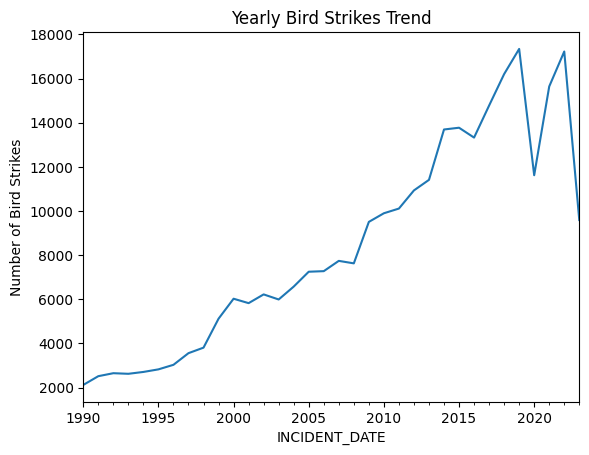

In [90]:
# Trend analysis (yearly bird strikes)
df.set_index('INCIDENT_DATE', inplace=True)
df.resample('Y').size().plot(title='Yearly Bird Strikes Trend')
plt.ylabel('Number of Bird Strikes')
plt.show()

<Axes: title={'center': 'Bird Strikes by Time of Day'}, xlabel='TIME_OF_DAY'>

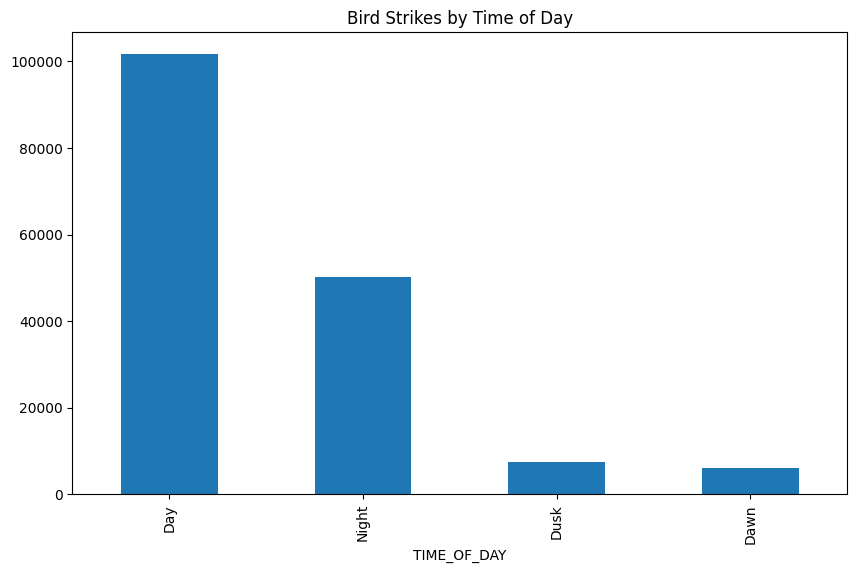

In [24]:
# Common times of day for bird strikes
plt.figure(figsize=(10, 6))
df['TIME_OF_DAY'].value_counts().plot(kind='bar', title='Bird Strikes by Time of Day')

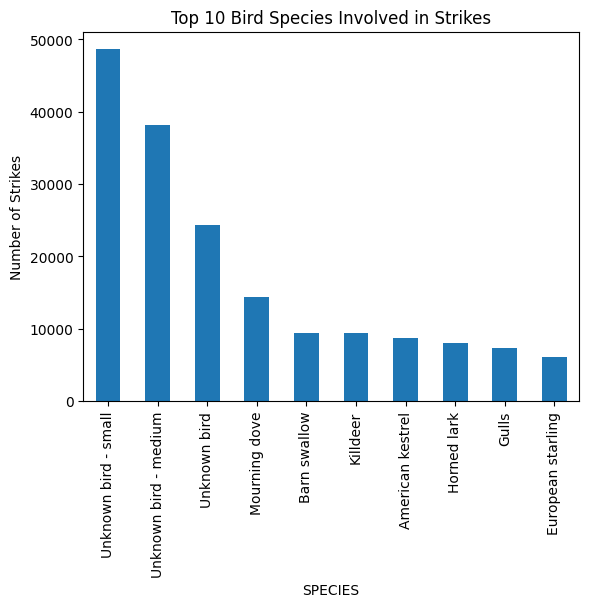

In [25]:
# Species Analysis (Bird Species Involved)
df['SPECIES'].value_counts().head(10).plot(kind='bar', title='Top 10 Bird Species Involved in Strikes')
plt.ylabel('Number of Strikes')
plt.show()

#### Visualize bird strikes by location

In [6]:
# Filter, such that only strikes that are known to have occured at night are selected
# night_df = df[df['TIME_OF_DAY'] == 'Night']

# Group by latitude and longitude, and count the number of strikes
grouped_data = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='NUMBER_OF_STRIKES')

# Display the first few rows of the new dataframe
print(grouped_data.head())

    LATITUDE   LONGITUDE  NUMBER_OF_STRIKES
0 -37.673333  144.843333                  1
1 -37.008056  174.791667                  5
2 -34.838417  -56.030806                 12
3 -34.822222  -58.535833                 72
4 -34.559175  -58.415606                  2


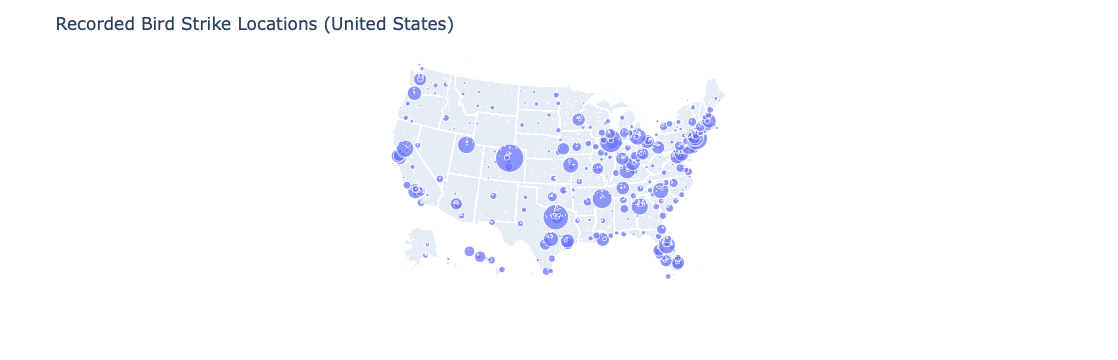

In [7]:
# Plot
fig = px.scatter_geo(grouped_data[grouped_data.NUMBER_OF_STRIKES>=1],  # Input Pandas DataFrame
                    lat="LATITUDE",  # DataFrame column with latitude
                    lon="LONGITUDE",  # DataFrame column with latitude
                    size="NUMBER_OF_STRIKES") # Set to plot size as number of strikes
fig.update_layout(
    title_text = 'Recorded Bird Strike Locations (United States)',
    geo_scope='usa',
)

fig.show()

/Users/joeypaulelihaynes/Library/Python/3.9/lib/python/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



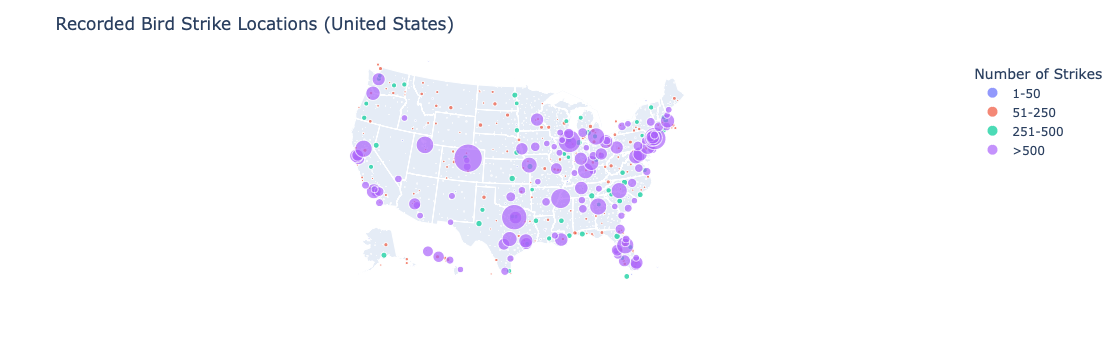

In [8]:
# Updated plot with color legend

# Create a categorical column based on 'NUMBER_OF_STRIKES'
grouped_data['STRIKE_CATEGORY'] = pd.cut(grouped_data['NUMBER_OF_STRIKES'], 
                                         bins=[0, 50, 250, 500, float('inf')], 
                                         labels=['1-50', '51-250', '251-500', '>500'])

# Plot
fig = px.scatter_geo(grouped_data[grouped_data.NUMBER_OF_STRIKES>=1],
                     lat="LATITUDE",
                     lon="LONGITUDE",
                     size="NUMBER_OF_STRIKES",
                     color="STRIKE_CATEGORY") # Use the new categorical column

fig.update_layout(
    title_text = 'Recorded Bird Strike Locations (United States)',
    geo_scope='usa',
    legend_title_text='Number of Strikes'
)

fig.show()

#### Integrate GIS light pollution map

In [102]:
# Import work from QGIS. New dataframe now includes light pollution level at each point (range 0 to 14)
light_bird_df = pd.read_csv('/Users/joeypaulelihaynes/ALAN/Data/bird_strikes_plus_light_pollution.csv')

In [103]:
light_bird_df.head(10)

LATITUDE   LONGITUDE  NUMBER_OF_STRIKES  LIGHT_POLLUTION_LEVEL
0  71.285450 -156.766000                 18                      9
1  70.325000 -149.591800                  6                     11
2  70.194760 -148.465160                 11                     10
3  70.209950 -151.005560                  1                      6
4  69.371113 -152.134983                  1                      0
5  66.884680 -162.598550                 43                      6
6  66.828530 -161.027790                  1                      3
7  66.600130 -159.985750                  1                      4
8  65.758611 -168.953056                  1                      0
9  65.697560 -156.351140                  1                      4

In [108]:
"""
Note: The original dataset contains a light pollution value that ranges from 0 to 14, where higher values indicate less light pollution, 
except for 1, which indicates the highest level of light pollution. This function normalizes these values so that they follow a
logical order, with higher values consistently representing higher levels of light pollution.
"""

# Define a normalization function
def normalize_light_pollution(value):
    # Assuming 1 is the highest pollution level, map it to a higher value
    if value == 1:
        return 15
    else:
        return value

# Apply the normalization function to the light pollution column
light_bird_df['LIGHT_POLLUTION_LEVEL'] = light_bird_df['LIGHT_POLLUTION_LEVEL'].apply(normalize_light_pollution)

In [109]:
# Pearson correlation
pearson_coef, p_value = pearsonr(light_bird_df['LIGHT_POLLUTION_LEVEL'], light_bird_df['NUMBER_OF_STRIKES'])
print('Pearson Correlation Coefficient:', pearson_coef)

Pearson Correlation Coefficient: 0.24562446909865215


In [110]:
# Spearman correlation
spearman_coef, p_value = spearmanr(light_bird_df['LIGHT_POLLUTION_LEVEL'], light_bird_df['NUMBER_OF_STRIKES'])
print('Spearman Correlation Coefficient:', spearman_coef)

Spearman Correlation Coefficient: 0.42288309466675844


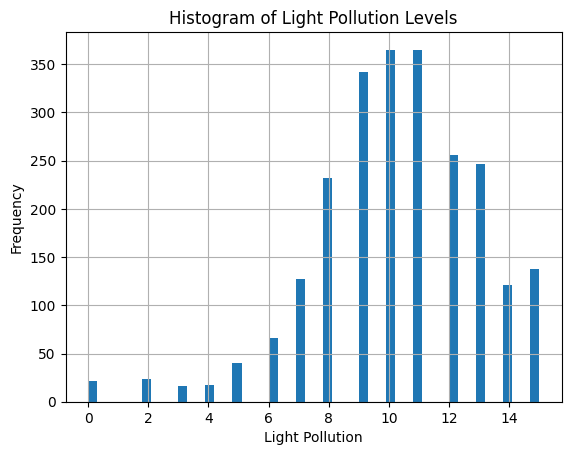

In [111]:
# Histogram of light pollution levels
light_bird_df['LIGHT_POLLUTION_LEVEL'].hist(bins=50)
plt.title('Histogram of Light Pollution Levels')
plt.xlabel('Light Pollution')
plt.ylabel('Frequency')
plt.show()

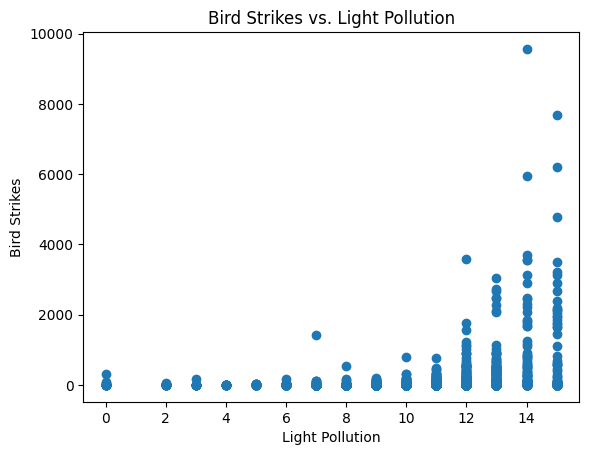

In [112]:
# Scatter plot of bird strikes vs. light pollution
plt.scatter(light_bird_df['LIGHT_POLLUTION_LEVEL'], light_bird_df['NUMBER_OF_STRIKES'])
plt.title('Bird Strikes vs. Light Pollution')
plt.xlabel('Light Pollution')
plt.ylabel('Bird Strikes')
plt.show()

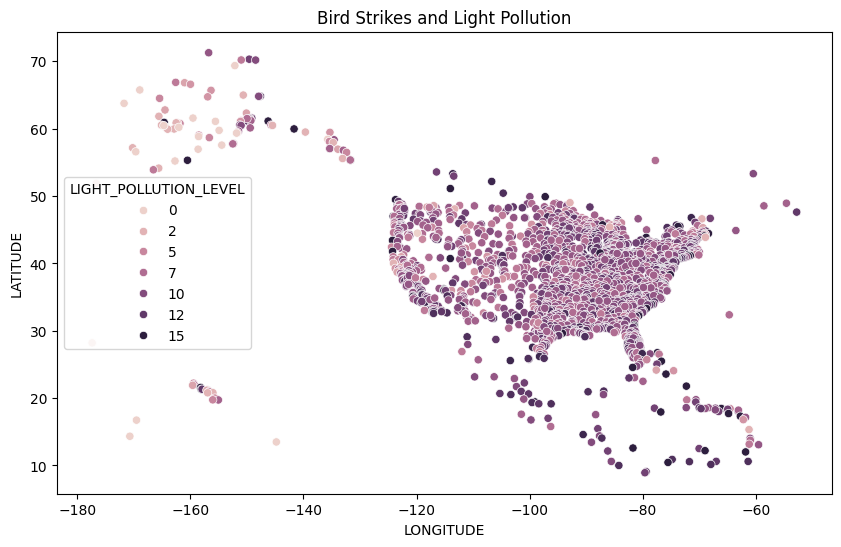

In [113]:
# Another scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=light_bird_df, x='LONGITUDE', y='LATITUDE', hue='LIGHT_POLLUTION_LEVEL')
plt.title('Bird Strikes and Light Pollution')
plt.show()

In [114]:
# Correlation matrix
correlation_matrix = light_bird_df.corr()
print(correlation_matrix)

                       LATITUDE  LONGITUDE  NUMBER_OF_STRIKES  \
LATITUDE               1.000000  -0.350498          -0.028709   
LONGITUDE             -0.350498   1.000000           0.017669   
NUMBER_OF_STRIKES     -0.028709   0.017669           1.000000   
LIGHT_POLLUTION_LEVEL -0.241804   0.317648           0.245624   

                       LIGHT_POLLUTION_LEVEL  
LATITUDE                           -0.241804  
LONGITUDE                           0.317648  
NUMBER_OF_STRIKES                   0.245624  
LIGHT_POLLUTION_LEVEL               1.000000  


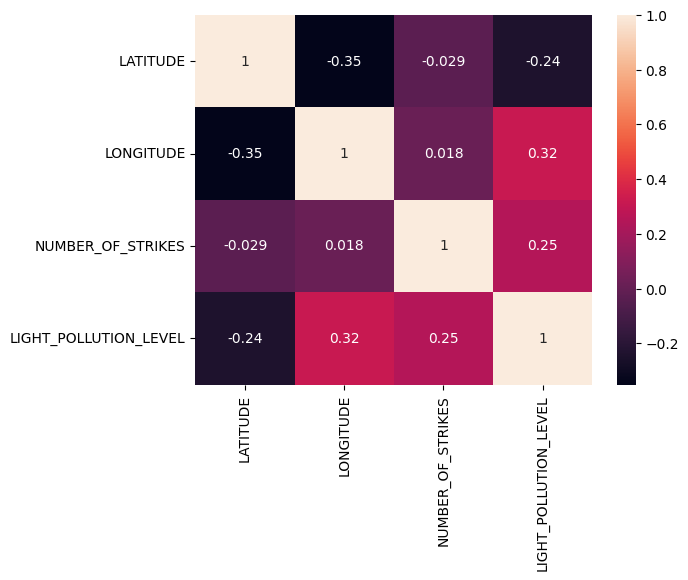

In [115]:
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()

array([[<Axes: xlabel='LATITUDE', ylabel='LATITUDE'>,
        <Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>,
        <Axes: xlabel='NUMBER_OF_STRIKES', ylabel='LATITUDE'>,
        <Axes: xlabel='LIGHT_POLLUTION_LEVEL', ylabel='LATITUDE'>],
       [<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>,
        <Axes: xlabel='LONGITUDE', ylabel='LONGITUDE'>,
        <Axes: xlabel='NUMBER_OF_STRIKES', ylabel='LONGITUDE'>,
        <Axes: xlabel='LIGHT_POLLUTION_LEVEL', ylabel='LONGITUDE'>],
       [<Axes: xlabel='LATITUDE', ylabel='NUMBER_OF_STRIKES'>,
        <Axes: xlabel='LONGITUDE', ylabel='NUMBER_OF_STRIKES'>,
        <Axes: xlabel='NUMBER_OF_STRIKES', ylabel='NUMBER_OF_STRIKES'>,
        <Axes: xlabel='LIGHT_POLLUTION_LEVEL', ylabel='NUMBER_OF_STRIKES'>],
       [<Axes: xlabel='LATITUDE', ylabel='LIGHT_POLLUTION_LEVEL'>,
        <Axes: xlabel='LONGITUDE', ylabel='LIGHT_POLLUTION_LEVEL'>,
        <Axes: xlabel='NUMBER_OF_STRIKES', ylabel='LIGHT_POLLUTION_LEVEL'>,
        <Axes: xlabel='LIGHT_

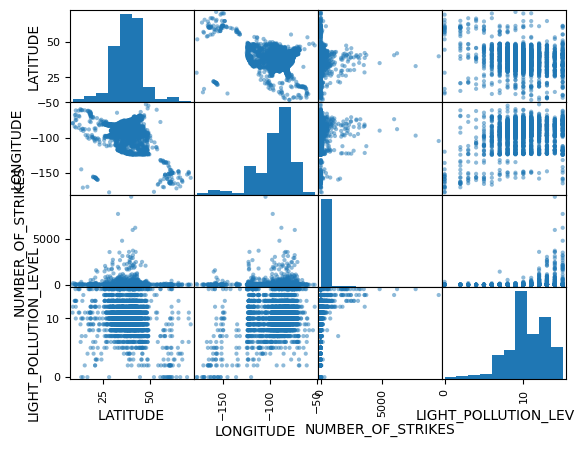

In [125]:
# TO-DO
# Pairwise relationships
pd.plotting.scatter_matrix(light_bird_df)

In [123]:
# Ordinary Least Squares regression
X = sm.add_constant(light_bird_df['LIGHT_POLLUTION_LEVEL'])  # Adds a constant term to the predictor
est = sm.OLS(light_bird_df['NUMBER_OF_STRIKES'], X).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:      NUMBER_OF_STRIKES   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.52e-34
Time:                        02:41:09   Log-Likelihood:                -17949.
No. Observations:                2376   AIC:                         3.590e+04
Df Residuals:                    2374   BIC:                         3.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -325.56